## Riksdagen P1204  
version 2.2

Egenskap i Wikidata som bör bytas till GUID P8388
* [denna notebook](https://github.com/salgo60/open-data-examples/blob/master/Riksdagen%20P1214.ipynb)
  * video [20201216 om denna notebook](https://youtu.be/BK7Cx0-s7Oo)
  * Phabricator [T235521](https://phabricator.wikimedia.org/T235521)
* [diskussion P1214](https://www.wikidata.org/wiki/Property_talk:P1214#Repair_needed) 
* egenskapsförslag [Wikidata:Property_proposal/Riksdagen_person_guid](https://www.wikidata.org/wiki/Wikidata:Property_proposal/Riksdagen_person_guid)
* [Riksdagensdata 1991 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=) 2020 jun
  * 2020-12-16 [2006 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=)

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2020-12-17 07:48:32.041467


In [2]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
 
url = "http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista="
r = http.request('GET', url)
data = json.loads(r.data)


In [3]:
df = pd.DataFrame(pd.DataFrame(data["personlista"]["person"]))
df.sample(4)

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
592,cac7e04e-dff2-419e-b106-e3fbbe98de97,7ee1658f-c95c-44c4-b113-2ccaa953fc5d,,4788783,0,man,Gernandt,Johan,"Gernandt,Johan",,,,Tidigare ledamot i Riksbanksfullmäktige,http://data.riksdagen.se/person/7ee1658f-c95c-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'RB', 'roll_kod': '...",
187,2c5b0b38-c294-4327-abab-9344a4246420,1a6e1360-a776-48a9-a181-3d1cb82203a1,0845242325301,2342235,1943,kvinna,Berglund,Märtha,"Berglund,Märtha",,S,,Status saknas,http://data.riksdagen.se/person/1a6e1360-a776-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'UbU', 'roll_kod': ...","{'uppgift': [{'kod': 'sv', 'uppgift': ['postmä..."
1946,9a1c133b-9fc8-4ac4-a9bb-f9926dade2b7,d7c3242c-83e4-11d4-ae60-0050040c9b55,0470861746302,2342112,1941,kvinna,Ytterberg,Mariann,"Ytterberg,Mariann",,S,Västmanlands län,Tidigare riksdagsledamot,http://data.riksdagen.se/person/d7c3242c-83e4-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'sv', 'uppgift': ['sjuksk..."
199,3df4920d-eb98-4428-9291-fce8b07b821e,7637d53c-2b40-45a2-af2c-192913c4798f,0957300271615,2343167,1961,man,Bernal,Loui,"Bernal,Loui",,MP,,Status saknas,http://data.riksdagen.se/person/7637d53c-2b40-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'AU', 'roll_kod': '...","{'uppgift': [{'kod': 'sv', 'uppgift': ['musike..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hangar_guid     2006 non-null   object
 1   sourceid        2006 non-null   object
 2   intressent_id   2006 non-null   object
 3   hangar_id       2006 non-null   object
 4   fodd_ar         2006 non-null   object
 5   kon             2006 non-null   object
 6   efternamn       2006 non-null   object
 7   tilltalsnamn    2006 non-null   object
 8   sorteringsnamn  2006 non-null   object
 9   iort            2006 non-null   object
 10  parti           2006 non-null   object
 11  valkrets        2006 non-null   object
 12  status          2006 non-null   object
 13  person_url_xml  2006 non-null   object
 14  bild_url_80     2006 non-null   object
 15  bild_url_192    2006 non-null   object
 16  bild_url_max    2006 non-null   object
 17  personuppdrag   2006 non-null   object
 18  personup

Det som skall bytas är  
* intressent_id e.g.  0758652610 
* till sourceid e.g 83345459-cc17-4d4a-b2bb-3748a0f3721c


In [5]:
#for index, row in df.iterrows(): 
#    print (row["tilltalsnamn"], " ", row["efternamn"], "|",  
#           row["intressent_id"],"|", row["sourceid"], "|" ,row["fodd_ar"], "|" ,row["parti"] )

In [6]:
df.describe()

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
count,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
unique,2006,2006,1884,2006,84,3,1425,733,1983,19,15,30,207,2006,2006,2006,2006,2006,1716
top,691b15f9-964e-40db-967c-47c2006f8c6a,d7c329ce-83e4-11d4-ae60-0050040c9b55,,2342427,0,man,Andersson,Lars,"Karlsson,Mattias",,S,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/f36aa123-927a-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'Systembolaget', 'r...",
freq,1,1,123,1,123,1115,49,46,2,1987,637,842,1032,1,1,1,1,1,291


In [7]:
#df.isnull() 

In [8]:
df.describe()

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
count,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
unique,2006,2006,1884,2006,84,3,1425,733,1983,19,15,30,207,2006,2006,2006,2006,2006,1716
top,691b15f9-964e-40db-967c-47c2006f8c6a,d7c329ce-83e4-11d4-ae60-0050040c9b55,,2342427,0,man,Andersson,Lars,"Karlsson,Mattias",,S,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/f36aa123-927a-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'Systembolaget', 'r...",
freq,1,1,123,1,123,1115,49,46,2,1987,637,842,1032,1,1,1,1,1,291


In [9]:
df.parti.unique()

array(['MP', 'L', 'M', 'S', '', 'KD', 'FP', '-', 'C', 'SD', 'PP', 'V',
       'NYD', 'JL', 'FI'], dtype=object)

In [10]:
df.parti.value_counts()

S      637
M      400
C      157
V      133
FP     129
MP     128
       121
KD     116
SD      90
L       45
NYD     24
-       20
JL       3
PP       2
FI       1
Name: parti, dtype: int64

In [11]:
df[df["parti"] == '-'][1:10]

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
78,2bf1ec39-4624-482b-8605-78ba0d1584d6,da0f2189-a8ae-4812-bf5b-bab23afa738b,0817420987900,2341996,1938,man,Andersson,John,"Andersson,John",,-,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/da0f2189-a8ae-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'en', 'uppgift': [{}], 't..."
97,b5b961cf-bd1d-4238-b2a2-87039574a890,d7c317d9-83e4-11d4-ae60-0050040c9b55,0892012091809,2342198,1943,man,Andersson,Sten,"Andersson,Sten",,-,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/d7c317d9-83e4-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'sv', 'uppgift': ['byggna..."
274,cdc4320c-6742-4146-9d9a-c2b1c3ae0aec,c93800eb-8db0-44fb-acc4-868d24527a63,049679140507,2341885,1935,man,Brohult,Johan,"Brohult,Johan",,-,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/c93800eb-8db0-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",
305,5b025fbe-995b-489e-b4f5-436b9a94f960,8340e89d-250a-4300-bab5-6937399ee277,0737073162411,2343464,1970,kvinna,Carlsson Löfdahl,Emma,"Carlsson Löfdahl,Emma",,-,Jönköpings län,Tjänstgörande riksdagsledamot,http://data.riksdagen.se/person/8340e89d-250a-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'L', 'roll_kod': 'K...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
513,faf50af6-b9c6-427f-92bd-58fbe0b68374,eb4a2005-9ec1-45c0-9f63-3e4ffdc4f04e,046426524512,3057163,1953,man,Felten,Olle,"Felten,Olle",,-,Södermanlands län,Tidigare riksdagsledamot,http://data.riksdagen.se/person/eb4a2005-9ec1-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
580,74b879f9-19e4-400c-88f4-8402f3d17653,a8568101-4108-42b7-8dd6-f14665dfa9ac,0504711999229,2858135,1989,man,Gamov,Pavel,"Gamov,Pavel",,-,Skåne läns södra,Tidigare riksdagsledamot,http://data.riksdagen.se/person/a8568101-4108-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
627,dc0dc4dc-1049-4894-8e18-aa1d01946a5b,1f0d91c1-605d-4b20-9825-fb8ee5373dcb,0697941234716,2369368,1964,kvinna,Gunsdotter,Margareta,"Gunsdotter,Margareta",,-,Västra Götalands läns östra,Tidigare riksdagsledamot,http://data.riksdagen.se/person/1f0d91c1-605d-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
672,3e3a835b-632e-49bf-9cb3-2327b39dedc5,9ba9d931-c9c0-4052-8c1b-9765f09cad69,0105126451619,2369430,1953,kvinna,Hagwall,Anna,"Hagwall,Anna",,-,Västerbottens län,Tidigare riksdagsledamot,http://data.riksdagen.se/person/9ba9d931-c9c0-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppg

In [12]:
df[df["parti"] == 'JL'] # Junilistan 

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
602,58844ed2-9155-4417-9c4c-6228691b4167,bae72946-11c5-43c6-b77f-840575379156,,4788866,0,okänt,Goudin,Hélène,"Goudin,Hélène",,JL,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/bae72946-11c5-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",
1154,dcb35c65-7738-4096-be6f-3175054aea0f,f38c2cc2-85ce-4981-afcb-a00190b7e99b,,4788864,0,okänt,Lundgren,Nils,"Lundgren,Nils",,JL,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/f38c2cc2-85ce-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",
1930,ed021f3f-e404-4937-ba32-a8a3c1bcb133,8a8fd224-61d6-437f-b655-91f3b38986c6,,4788865,0,okänt,Wohlin,Lars,"Wohlin,Lars",,JL,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/8a8fd224-61d6-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",


In [13]:
df[df["parti"] == 'PP'] #  Piratpartiet

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
50,d1227eb7-dff4-4a95-9134-4e8bff6f622d,60f468dd-1052-49c8-bf6d-05b0e1a4dac5,0528830353520,2821456,1987,kvinna,Andersdotter,Amelia,"Andersdotter,Amelia",,PP,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/60f468dd-1052-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...","{'uppgift': [{'kod': 'Webbsida', 'uppgift': ['..."
449,9df4dbf5-7579-4912-8550-ef963616f134,4af0724f-02ce-4a91-8af0-fa2154606b6f,0735009164618,2821454,1960,man,Engström,Christian,"Engström,Christian",,PP,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/4af0724f-02ce-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...","{'uppgift': [{'kod': 'Webbsida', 'uppgift': ['..."


In [14]:
df[df["parti"] == 'FI'] #  FI

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
1468,f7082c5f-414a-4005-9e85-9f7791fbf868,df8e12a0-74e4-4af5-b568-bd708f4c2bb0,,4788846,0,kvinna,Post,Soraya,"Post,Soraya",,FI,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/df8e12a0-74e4-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",


In [15]:
df.valkrets.value_counts()

                                842
Stockholms län                  145
Stockholms kommun               129
Göteborgs kommun                 61
Skåne läns södra                 48
Uppsala län                      48
Östergötlands län                44
Örebro län                       42
Hallands län                     39
Västra Götalands läns västra     38
Södermanlands län                38
Dalarnas län                     38
Värmlands län                    36
Västerbottens län                36
Västra Götalands läns norra      35
Skåne läns västra                35
Jönköpings län                   35
Västmanlands län                 33
Gävleborgs län                   32
Norrbottens län                  31
Malmö kommun                     30
Skåne läns norra och östra       29
Kalmar län                       29
Västernorrlands län              28
Västra Götalands läns östra      27
Västra Götalands läns södra      22
Kronobergs län                   19
Jämtlands län               

In [16]:
df.status.value_counts()

Tidigare riksdagsledamot                                       1032
Tjänstgörande riksdagsledamot                                   321
Tidigare ersättare                                              175
Tillgänglig ersättare                                            77
Status saknas                                                    23
                                                               ... 
Avliden  2019-04-29                                               1
Tidigare ställföreträdande ombudsman i Riksdagens ombudsmän       1
Avliden  2019-02-15                                               1
Avliden  2002-10-26                                               1
Avliden  2011-06-15                                               1
Name: status, Length: 207, dtype: int64

In [17]:
for r,y in df.status.value_counts().iteritems():
    if r.split(" ")[0] not in "Avliden" :
        print (r,y)

Tidigare riksdagsledamot 1032
Tjänstgörande riksdagsledamot 321
Tidigare ersättare 175
Tillgänglig ersättare 77
Status saknas 23
Europaparlamentariker 21
Avgången riksdagsledamot 21
Tidigare europaparlamentariker 20
Tidigare ledamot i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 15
Tjänstgörande statsrådsersättare 14
Tidigare statsråd 13
Tidigare personlig suppleant i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 12
Statsråd 11
Tjänstledig riksdagsledamot 10
Tjänstgörande ersättare 10
Tidigare riksrevisor i Riksrevisorerna 6
Ledamot i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 5
Personlig suppleant i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 4
Tidigare justitieombudsman i Riksdagens ombudsmän 4
Justitieombudsman i Riksdagens ombudsmän 3
Tidigare riksrevisor med administrativt ansvar i Riksrevisorerna 3
Ställföreträdande ombudsman i Riksdagens ombudsmän 3
Tidigare ledamot i Riksdagens arvodesnämnd 2
Ledamot i Riksdagens arvodesnämnd 2
Ledamot i Nämnden för lö

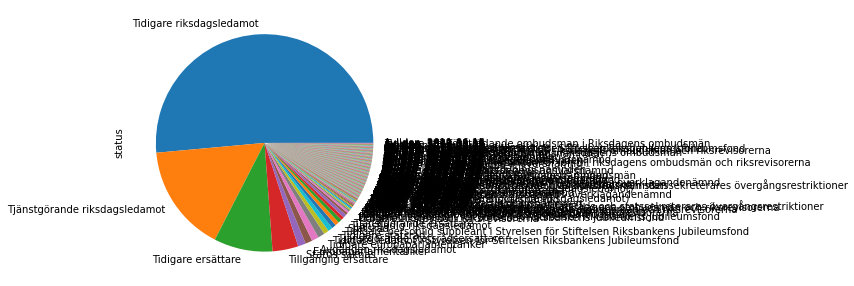

In [18]:
%matplotlib inline  
import matplotlib.pyplot as plt   
plot = df["status"].value_counts().plot.pie(y='counts', figsize=(5, 5))  
plt.show()

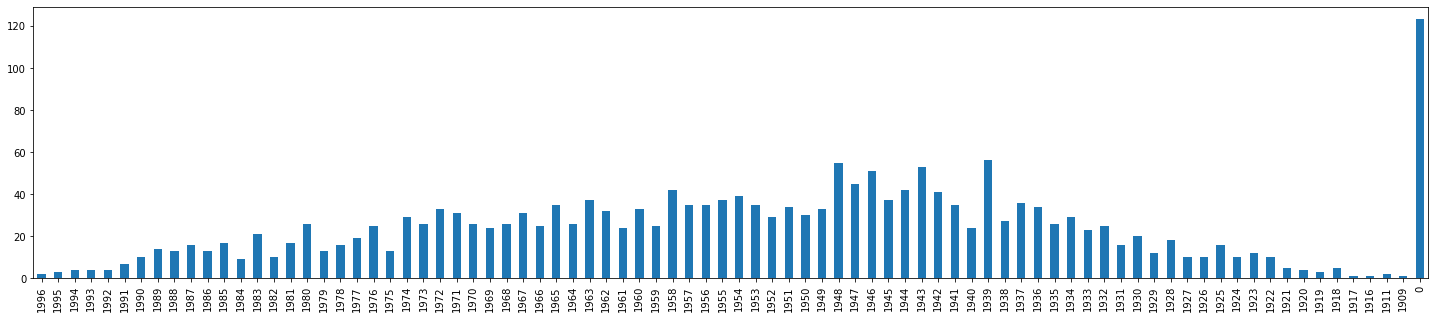

In [19]:
plot = df.fodd_ar.value_counts().sort_index(ascending=False).plot.bar(y='counts', figsize=(25, 5))  
plt.show()

In [20]:
df.iort.value_counts()

               1987
Stockholm         2
Luleå             1
Uppsala           1
Simrishamn        1
Stjärnhov         1
Göteborg          1
Stockaryd         1
Gislaved          1
Gamleby           1
Skellefteå        1
Bengtsfors        1
Hallsberg         1
Helsingborg       1
Linköping         1
Visby             1
Degerhamn         1
Norrhult          1
Röstånga          1
Name: iort, dtype: int64

### Compare WD - P8388 = Riksdagen person GUID

In [21]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP8388 = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?riksdagenGUID  WHERE {
?item wdt:P8388 ?riksdagenGUID
}"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDP8388 = get_sparql_dataframe(endpoint_url, queryP8388)
WDP8388["Source"] = "PropertyP8388" 

In [22]:
WDP8388.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     1877 non-null   object
 1   riksdagenGUID  1877 non-null   object
 2   Source         1877 non-null   object
dtypes: object(3)
memory usage: 44.1+ KB


In [23]:
WDP8388.sample(10)

,WikidataID,riksdagenGUID,Source
314,Q4941329,b0cce726-5e23-4d21-a609-95071f8820f0,PropertyP8388
405,Q5560456,07b5b43f-3cc1-4a40-9dd2-924349824977,PropertyP8388
916,Q4944871,1e2ffe2c-59c6-4f5d-9c4d-e509f20324ce,PropertyP8388
826,Q5969402,7014f634-92a5-4cc1-8d4c-85cf3e237a1d,PropertyP8388
684,Q5795789,2015a74d-1f10-444e-9607-df580692180d,PropertyP8388
85,Q4609816,9bf6b7c1-50b0-4eb2-945c-5b289d474306,PropertyP8388
896,Q6045607,20175651-c84d-469b-a289-4b92a4567553,PropertyP8388
20,Q3373169,f1484855-05d7-498f-8872-5a0c33ad535b,PropertyP8388
204,Q491206,73501b2c-9f06-4208-b3fb-a78e49559a4f,PropertyP8388
1695,Q96309257,4eac8050-e0c1-4141-8923-de511cec4b61,PropertyP8388


### Compare Riksdagen <-> WD 

In [24]:
#WDP1214 <-> df
mergeRiksdagenWD = pd.merge(WDP8388, df,how='outer', left_on='riksdagenGUID', right_on='sourceid',indicator=True)   
mergeRiksdagenWD.rename(columns={"_merge": "WD_Riksdagen"},inplace = True)
mergeRiksdagenWD['WD_Riksdagen'] = mergeRiksdagenWD['WD_Riksdagen'].str.replace('left_only','WD_only').str.replace('right_only','Riksdagen_only')
mergeRiksdagenWD["WD_Riksdagen"].value_counts()  
mergeRiksdagenWD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2005
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   WikidataID      1877 non-null   object
 1   riksdagenGUID   1877 non-null   object
 2   Source          1877 non-null   object
 3   hangar_guid     2006 non-null   object
 4   sourceid        2006 non-null   object
 5   intressent_id   2006 non-null   object
 6   hangar_id       2006 non-null   object
 7   fodd_ar         2006 non-null   object
 8   kon             2006 non-null   object
 9   efternamn       2006 non-null   object
 10  tilltalsnamn    2006 non-null   object
 11  sorteringsnamn  2006 non-null   object
 12  iort            2006 non-null   object
 13  parti           2006 non-null   object
 14  valkrets        2006 non-null   object
 15  status          2006 non-null   object
 16  person_url_xml  2006 non-null   object
 17  bild_url_80     2006 non-null   object
 18  bild_url

In [25]:
mergeRiksdagenWD["WD_Riksdagen"].value_counts() 

both              1877
Riksdagen_only     129
Name: WD_Riksdagen, dtype: int64

In [26]:
mergeCheck = mergeRiksdagenWD[['WikidataID', 'riksdagenGUID','Source','sourceid','WD_Riksdagen','tilltalsnamn','efternamn','parti','fodd_ar','intressent_id']] 

In [27]:
Riksdagen_only = mergeCheck[mergeCheck["WD_Riksdagen"] == "Riksdagen_only"].copy() 

In [28]:
Riksdagen_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 1877 to 2005
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   riksdagenGUID  0 non-null      object
 2   Source         0 non-null      object
 3   sourceid       129 non-null    object
 4   WD_Riksdagen   129 non-null    object
 5   tilltalsnamn   129 non-null    object
 6   efternamn      129 non-null    object
 7   parti          129 non-null    object
 8   fodd_ar        129 non-null    object
 9   intressent_id  129 non-null    object
dtypes: object(10)
memory usage: 11.1+ KB


In [29]:
pd.set_option('display.max_rows', None) 
#Riksdagen_only

In [30]:
from IPython.display import display, HTML   
Riksdagen_only["Riksdagen"] = "<a href='https://www.riksdagen.se/sv/ledamoter-partier/ledamot/_" + Riksdagen_only['sourceid'].astype(str) + "'>link</a>"
Riksdagen_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 1877 to 2005
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   riksdagenGUID  0 non-null      object
 2   Source         0 non-null      object
 3   sourceid       129 non-null    object
 4   WD_Riksdagen   129 non-null    object
 5   tilltalsnamn   129 non-null    object
 6   efternamn      129 non-null    object
 7   parti          129 non-null    object
 8   fodd_ar        129 non-null    object
 9   intressent_id  129 non-null    object
 10  Riksdagen      129 non-null    object
dtypes: object(11)
memory usage: 12.1+ KB


In [31]:
Riksdagen_only = Riksdagen_only.sort_values(by=['fodd_ar'], ascending=[False])
HTML(Riksdagen_only[{'tilltalsnamn','efternamn','parti','WikidataID','Riksdagen','fodd_ar','intressent_id'}].to_html(escape=False))


,Riksdagen,WikidataID,parti,fodd_ar,intressent_id,tilltalsnamn,efternamn
1939,link,NaN,S,1962,0924240425218,Michael,Lund
1944,link,NaN,S,1962,0829600202519,Anna-Karin,Lundström
1877,link,NaN,C,1961,0823220795415,Elisabeth,Andersson
1923,link,NaN,S,1959,0632149550015,Lars-Olof,Karlsson
1881,link,NaN,C,1958,0618278689611,Michael,Arthursson
1937,link,NaN,V,1958,0932188207010,Leif,Lindström
1945,link,NaN,M,1955,0910587614018,Mohamoud,M. Enow
1992,link,NaN,M,1954,0977557986415,Gunnel,Söderberg
1900,link,NaN,S,1954,0965607699115,Kerstin,Fredriksson
1986,link,NaN,KD,1953,0275126649110,Kalle,Sandell


In [32]:
Riksdagen_only["fodd_ar"].value_counts() 

0       90
1940     3
1943     3
1937     3
1935     2
1954     2
1958     2
1942     2
1962     2
1939     2
1955     1
1945     1
1949     1
1944     1
1928     1
1934     1
1959     1
1919     1
1926     1
1923     1
1941     1
1936     1
1953     1
1961     1
1950     1
1922     1
1947     1
1931     1
Name: fodd_ar, dtype: int64

In [33]:
Riksdagen_only["parti"].value_counts() 

      94
S     13
M      7
C      4
MP     4
V      4
KD     1
-      1
SD     1
Name: parti, dtype: int64

### Check WD if we have P1214 set but not P8388 GUID

In [34]:
import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP1214 = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?WDriksdagenID  WHERE {
?item wdt:P1214 ?WDriksdagenID.
minus {?item wdt:P8388 ?riksdagenGUID}
}"""


WDP1214 = get_sparql_dataframe(endpoint_url, queryP1214)
WDP1214["Source"] = "PropertyP1214" 

In [35]:
WDP1214.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     3 non-null      object
 1   WDriksdagenID  3 non-null      object
 2   Source         3 non-null      object
dtypes: object(3)
memory usage: 200.0+ bytes


In [36]:
#Merge WDP1214 with Riksdagen_only
#mergeCheckWDP214[mergeCheck["WD_Riksdagen"] == "Riksdagen_only"].copy()  
mergeRiksdagenWDP214 = pd.merge(WDP1214, df,how='outer', left_on='WDriksdagenID', right_on='intressent_id',indicator=True)   
mergeRiksdagenWDP214.rename(columns={"_merge": "WDP1214_Riksdagen"},inplace = True)
mergeRiksdagenWDP214['WDP1214_Riksdagen'] = mergeRiksdagenWDP214['WDP1214_Riksdagen'].str.replace('left_only','WDP1214_only').str.replace('right_only','Riksdagenintressent_id_only')
mergeRiksdagenWDP214["WDP1214_Riksdagen"].value_counts()  
mergeRiksdagenWDP214.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   WikidataID         3 non-null      object
 1   WDriksdagenID      3 non-null      object
 2   Source             3 non-null      object
 3   hangar_guid        2006 non-null   object
 4   sourceid           2006 non-null   object
 5   intressent_id      2006 non-null   object
 6   hangar_id          2006 non-null   object
 7   fodd_ar            2006 non-null   object
 8   kon                2006 non-null   object
 9   efternamn          2006 non-null   object
 10  tilltalsnamn       2006 non-null   object
 11  sorteringsnamn     2006 non-null   object
 12  iort               2006 non-null   object
 13  parti              2006 non-null   object
 14  valkrets           2006 non-null   object
 15  status             2006 non-null   object
 16  person_url_xml     2006 non-null   object


In [37]:
mergeRiksdagenWDP214["WDP1214_Riksdagen"].value_counts() 

Riksdagenintressent_id_only    2006
WDP1214_only                      3
Name: WDP1214_Riksdagen, dtype: int64

In [38]:
Riksdagen_intressent_id_only = mergeRiksdagenWDP214[mergeRiksdagenWDP214["WDP1214_Riksdagen"] == "both"].copy() 
HTML(Riksdagen_intressent_id_only[{'sourceid','tilltalsnamn','efternamn','parti','WikidataID','fodd_ar','intressent_id','WDriksdagenID','WDP1214_Riksdagen'}].to_html(escape=False))


,WikidataID,parti,sourceid,fodd_ar,intressent_id,tilltalsnamn,WDP1214_Riksdagen,WDriksdagenID,efternamn


In [39]:
#create file to update Wikidata with GUID 
#This file should be empty
HTML(Riksdagen_intressent_id_only[{'WikidataID','sourceid'}].to_html(escape=False))


,sourceid,WikidataID


In [40]:
#Maybe should be empty. We need to ask Riksdagen if they delete people,,, if not we have errors in WD or in this Notebook
Riksdagen_intressent_wd_only = mergeRiksdagenWDP214[mergeRiksdagenWDP214["WDP1214_Riksdagen"] == "WDP1214_only"].copy() 
Riksdagen_intressent_wd_only

,WikidataID,WDriksdagenID,Source,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift,WDP1214_Riksdagen
0,Q1232072,0553241385804,PropertyP1214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WDP1214_only
1,Q5619080,0631064113607,PropertyP1214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WDP1214_only
2,Q5937929,0818762925009,PropertyP1214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WDP1214_only


## Check WD if we have P8388 GUID set but not old P1214 
* as old documents use P1214 its make sense to have both
* new created records seems to lack P1214 at Riksdagen

In [55]:
import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

queryP8388miss = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?WDriksdagenGUID  WHERE {
?item wdt:P8388 ?WDriksdagenGUID.
minus {?item wdt:P1214 ?riksdagenID}
}"""


WDP8388_miss = get_sparql_dataframe(endpoint_url, queryP8388miss)
WDP8388_miss["Source"] = "Property8388" 

In [56]:
WDP8388_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   WikidataID       57 non-null     object
 1   WDriksdagenGUID  57 non-null     object
 2   Source           57 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [65]:
# merge WDP8388_miss WDriksdagenGUID with  
mergeRiksdagenWDP8388_miss = pd.merge(WDP8388_miss, df,how='outer', left_on='WDriksdagenGUID', right_on='sourceid',indicator=True)   
mergeRiksdagenWDP8388_miss.rename(columns={"_merge": "WDP8388_miss_Riksdagen"},inplace = True)
mergeRiksdagenWDP8388_miss['WDP8388_miss_Riksdagen'] = mergeRiksdagenWDP8388_miss['WDP8388_miss_Riksdagen'].str.replace('left_only','WDP8388_miss_Riksdagen_only').str.replace('right_only','Riksdagensourceid_only')
mergeRiksdagenWDP8388_miss["WDP8388_miss_Riksdagen"].value_counts()  

Riksdagensourceid_only    1949
both                        57
Name: WDP8388_miss_Riksdagen, dtype: int64

In [69]:
mergeRiksdagenWDP8388_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2005
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   WikidataID              57 non-null     object
 1   WDriksdagenGUID         57 non-null     object
 2   Source                  57 non-null     object
 3   hangar_guid             2006 non-null   object
 4   sourceid                2006 non-null   object
 5   intressent_id           2006 non-null   object
 6   hangar_id               2006 non-null   object
 7   fodd_ar                 2006 non-null   object
 8   kon                     2006 non-null   object
 9   efternamn               2006 non-null   object
 10  tilltalsnamn            2006 non-null   object
 11  sorteringsnamn          2006 non-null   object
 12  iort                    2006 non-null   object
 13  parti                   2006 non-null   object
 14  valkrets                2006 non-null   object
 15  stat

In [71]:
WD_P8388_only = mergeRiksdagenWDP8388_miss[mergeRiksdagenWDP8388_miss["WDP8388_miss_Riksdagen"] == "both"].copy() 
# TO DO filter only records with intressent_id ==> those wD records should get P1214
HTML(WD_P8388_only[{'WikidataID','intressent_id','sourceid'}].to_html(escape=False))


,intressent_id,sourceid,WikidataID
0,,e82c1f92-231c-42ac-900c-bd2b84f8d34c,Q129454
1,,bae72946-11c5-43c6-b77f-840575379156,Q443148
2,,24f105bb-e207-46f4-b9b9-c2d53216c0ef,Q1976379
3,0344762184207,d1ec7c4f-c800-4731-81b1-25c6eb2e276b,Q4126210
4,,69a92d50-4e6c-4299-a95b-50bb4950812a,Q4933709
5,,7a8e4e1d-ca9d-4cdf-80d6-b26baad306c2,Q4935193
6,,8aaa214a-3eb6-41e0-8595-3920b1b6583a,Q4936260
7,,8069b32a-0dde-4330-b839-b8bcdcf6093e,Q4975127
8,,ca836659-d074-44b7-9a9f-3c8aa2a909f1,Q4979070
9,,c8ca9b65-142e-47ee-b945-a6356048e3e4,Q4988619


In [61]:
mergeRiksdagenWDP8388_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2005
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   WikidataID              57 non-null     object  
 1   WDriksdagenGUID         57 non-null     object  
 2   Source                  57 non-null     object  
 3   hangar_guid             2006 non-null   object  
 4   sourceid                2006 non-null   object  
 5   intressent_id           2006 non-null   object  
 6   hangar_id               2006 non-null   object  
 7   fodd_ar                 2006 non-null   object  
 8   kon                     2006 non-null   object  
 9   efternamn               2006 non-null   object  
 10  tilltalsnamn            2006 non-null   object  
 11  sorteringsnamn          2006 non-null   object  
 12  iort                    2006 non-null   object  
 13  parti                   2006 non-null   object  
 14  valkrets                

In [41]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2020-12-17 07:48:51.674267
Time elapsed (hh:mm:ss.ms) 0:00:19.633243
